<a href="https://colab.research.google.com/github/sebascm/TFM_Source_Code/blob/main/TFM_v4_EDA_Model_Train_ROTURAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carga de datos

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
date_cols = ['idSecuencia']
ruta = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/data_ventas_stock_calendario_joined.csv"
data_ventas_stock_calendario = pd.read_csv(ruta, parse_dates=date_cols)

In [ ]:
data_ventas_stock_calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706640 entries, 0 to 706639
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   producto         706640 non-null  int64         
 1   idSecuencia      706640 non-null  datetime64[ns]
 2   udsVenta         706640 non-null  int64         
 3   udsStock         706640 non-null  int64         
 4   bolOpen          706640 non-null  int64         
 5   bolHoliday       706640 non-null  int64         
 6   estaEnPromocion  706640 non-null  int64         
 7   año              706640 non-null  int64         
 8   mes              706640 non-null  int64         
 9   dia              706640 non-null  int64         
 10  dia_semana       706640 non-null  int64         
 11  semana_mes       706640 non-null  int64         
 12  semana_año       706640 non-null  int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 70.1 MB


# **Outliers**


In [ ]:
data_ventas_stock_calendario_out = data_ventas_stock_calendario

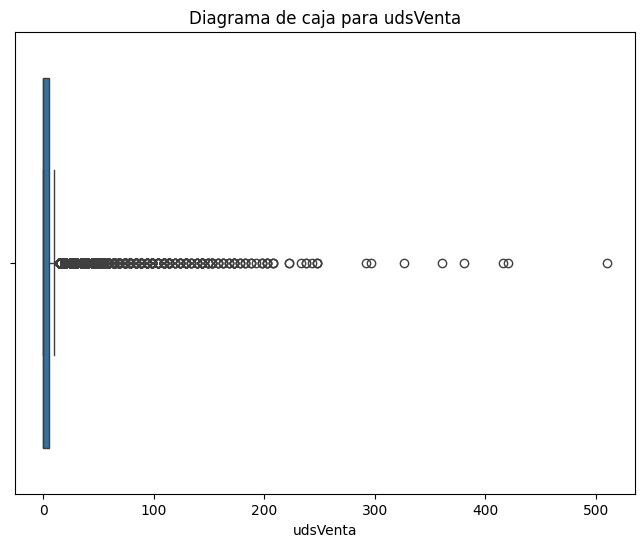

In [ ]:
# Crear un diagrama de caja para identificar outliers en udsVenta
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_ventas_stock_calendario_out['udsVenta'])
plt.title('Diagrama de caja para udsVenta')
plt.xlabel('udsVenta')
plt.show()

In [ ]:
data_ventas_stock_calendario_out[data_ventas_stock_calendario_out['udsVenta'] == 510]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año
99024,140,2022-07-22,510,510,1,0,0,2022,7,22,4,3,29


In [ ]:
data_ventas_stock_calendario_out[data_ventas_stock_calendario_out['producto'] == 140]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año
98550,140,2021-04-04,0,475,0,1,1,2021,4,4,6,0,13
98551,140,2021-04-05,5,475,0,1,1,2021,4,5,0,0,14
98552,140,2021-04-06,10,470,1,0,1,2021,4,6,1,0,14
98553,140,2021-04-07,0,465,1,0,1,2021,4,7,2,1,14
98554,140,2021-04-08,5,663,1,0,0,2021,4,8,3,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99275,140,2023-03-30,5,183,1,0,0,2023,3,30,3,4,13
99276,140,2023-03-31,10,178,1,0,0,2023,3,31,4,4,13
99277,140,2023-04-01,0,168,1,0,0,2023,4,1,5,0,13
99278,140,2023-04-02,0,168,0,1,0,2023,4,2,6,0,13


In [ ]:
import pandas as pd
import numpy as np

# Supongamos que 'data' es tu DataFrame con las ventas por producto y mes

# Calcular la media y la desviación estándar agrupadas por producto y mes
data_ventas_stock_calendario_out['media_ventas'] = data_ventas_stock_calendario_out.groupby(['producto', 'mes'])['udsVenta'].transform('mean')
data_ventas_stock_calendario_out['desviacion_estandar_ventas'] = data_ventas_stock_calendario_out.groupby(['producto', 'mes'])['udsVenta'].transform('std')

# Definir el umbral para outliers
umbral_multiplicador = 3  # Por ejemplo, considerar como outliers los valores a más de 3 desviaciones estándar de la media
data_ventas_stock_calendario_out['umbral_superior'] = data_ventas_stock_calendario_out['media_ventas'] + umbral_multiplicador * data_ventas_stock_calendario_out['desviacion_estandar_ventas']
data_ventas_stock_calendario_out['umbral_inferior'] = data_ventas_stock_calendario_out['media_ventas'] - umbral_multiplicador * data_ventas_stock_calendario_out['desviacion_estandar_ventas']

data_ventas_stock_calendario_out['udsVenta_corregidas'] = np.where(data_ventas_stock_calendario_out['udsVenta'] > data_ventas_stock_calendario_out['umbral_superior'], data_ventas_stock_calendario_out['media_ventas'], data_ventas_stock_calendario_out['udsVenta'])

data_ventas_stock_calendario_out['udsVenta_corregidas'] = round(data_ventas_stock_calendario_out['udsVenta_corregidas'])


In [ ]:
data_ventas_stock_calendario_out[(data_ventas_stock_calendario_out['producto'] == 140) & (data_ventas_stock_calendario_out['mes'] == 7)]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior,udsVenta_corregidas
98638,140,2021-07-01,0,510,1,0,0,2021,7,1,3,0,26,12.096774,64.525687,205.673834,-181.480286,0.0
98639,140,2021-07-02,0,510,1,0,0,2021,7,2,4,0,26,12.096774,64.525687,205.673834,-181.480286,0.0
98640,140,2021-07-03,5,510,1,0,0,2021,7,3,5,0,26,12.096774,64.525687,205.673834,-181.480286,5.0
98641,140,2021-07-04,0,505,1,1,0,2021,7,4,6,0,26,12.096774,64.525687,205.673834,-181.480286,0.0
98642,140,2021-07-05,5,505,1,0,0,2021,7,5,0,0,27,12.096774,64.525687,205.673834,-181.480286,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99029,140,2022-07-27,0,0,1,0,0,2022,7,27,2,3,30,12.096774,64.525687,205.673834,-181.480286,0.0
99030,140,2022-07-28,0,396,1,0,0,2022,7,28,3,4,30,12.096774,64.525687,205.673834,-181.480286,0.0
99031,140,2022-07-29,0,396,1,0,0,2022,7,29,4,4,30,12.096774,64.525687,205.673834,-181.480286,0.0
99032,140,2022-07-30,0,396,0,1,0,2022,7,30,5,4,30,12.096774,64.525687,205.673834,-181.480286,0.0


In [ ]:
# Convertir 'udsVenta_corregidas' a tipo de datos entero (int)
data_ventas_stock_calendario_out['udsVenta_corregidas'] = data_ventas_stock_calendario_out['udsVenta_corregidas'].astype(int)

# Asignar 'udsVenta_corregidas' a 'udsVenta'
data_ventas_stock_calendario_out['udsVenta'] = data_ventas_stock_calendario_out['udsVenta_corregidas']

# Eliminar la columna 'udsVenta_corregidas'
data_ventas_stock_calendario_out.drop('udsVenta_corregidas', axis=1, inplace=True)


In [ ]:
data_ventas_stock_calendario_out.isna().sum()

producto                      0
idSecuencia                   0
udsVenta                      0
udsStock                      0
bolOpen                       0
bolHoliday                    0
estaEnPromocion               0
año                           0
mes                           0
dia                           0
dia_semana                    0
semana_mes                    0
semana_año                    0
media_ventas                  0
desviacion_estandar_ventas    0
umbral_superior               0
umbral_inferior               0
dtype: int64

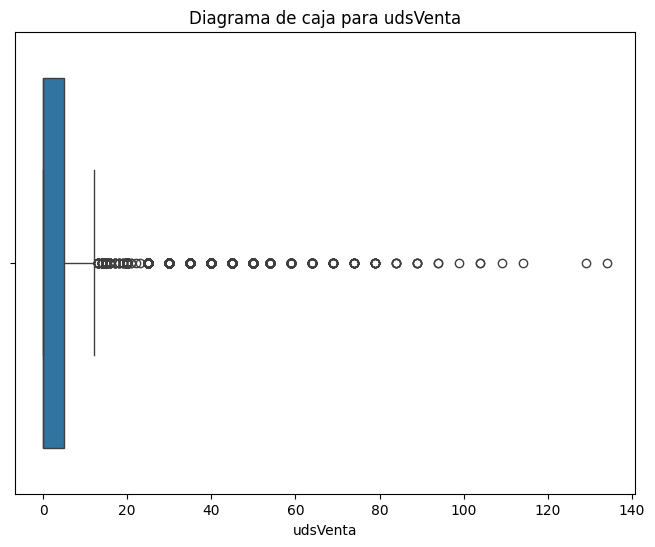

In [ ]:
# Crear un diagrama de caja para identificar outliers en udsVenta
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_ventas_stock_calendario_out['udsVenta'])
plt.title('Diagrama de caja para udsVenta')
plt.xlabel('udsVenta')
plt.show()

Roturas de stock

In [ ]:
data_ventas_stock_calendario_out[(data_ventas_stock_calendario_out['udsVenta'] == 0) & (data_ventas_stock_calendario_out['udsStock'] == 0)]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior
919,2,2021-10-10,0,0,0,1,1,2021,10,10,6,1,40,21.500000,16.118160,69.854480,-26.854480
921,2,2021-10-12,0,0,0,1,1,2021,10,12,1,1,41,21.500000,16.118160,69.854480,-26.854480
926,2,2021-10-17,0,0,0,1,1,2021,10,17,6,2,41,21.500000,16.118160,69.854480,-26.854480
1581,3,2021-08-03,0,0,1,0,1,2021,8,3,1,0,31,25.177419,28.042429,109.304707,-58.949869
1611,3,2021-09-02,0,0,1,0,0,2021,9,2,3,0,35,13.533333,16.768076,63.837560,-36.770894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706218,1000,2022-02-06,0,0,0,1,0,2022,2,6,6,0,5,3.214286,4.515486,16.760743,-10.332171
706271,1000,2022-03-31,0,0,1,0,0,2022,3,31,3,4,13,2.983871,3.993815,14.965315,-8.997573
706272,1000,2022-04-01,0,0,1,0,0,2022,4,1,4,0,13,2.916667,3.828048,14.400812,-8.567479
706273,1000,2022-04-02,0,0,1,0,0,2022,4,2,5,0,13,2.916667,3.828048,14.400812,-8.567479


In [ ]:
import pandas as pd

data_ventas_stock_calendario_out['udsVenta_media'] = data_ventas_stock_calendario_out['udsVenta']

# 1. Filtrar los datos para obtener solo las filas donde udsVenta = udsStock = 0
data_rotura_stock = data_ventas_stock_calendario_out[(data_ventas_stock_calendario_out['udsVenta'] == 0) & (data_ventas_stock_calendario_out['udsStock'] == 0)]

# 2. Agrupar los datos por producto y día de la semana
grouped_data = data_rotura_stock.groupby(['producto', 'dia_semana'])

# 3. Iterar sobre cada grupo
for (producto, dia_semana), group_data in grouped_data:
    # 4. Iterar sobre cada fila del grupo
    for index, row in group_data.iterrows():
        # 5. Obtener la fecha y el día de la semana
        fecha = row['idSecuencia']
        dia_semana = row['dia_semana']

        # 6. Calcular la fecha de inicio y fin de las últimas cuatro semanas
        fecha_inicio = fecha - pd.DateOffset(weeks=4)
        fecha_fin = fecha - pd.DateOffset(weeks=1)

        # 7. Filtrar las ventas de las últimas cuatro semanas para el mismo día de la semana
        ventas_ultimas_semanas = data_ventas_stock_calendario_out[
            (data_ventas_stock_calendario_out['producto'] == producto) &
            (data_ventas_stock_calendario_out['idSecuencia'] >= fecha_inicio) &
            (data_ventas_stock_calendario_out['idSecuencia'] <= fecha_fin) &
            (data_ventas_stock_calendario_out['dia_semana'] == dia_semana)
        ]

        # 8. Calcular la media de las ventas de las últimas cuatro semanas
        media_ventas = ventas_ultimas_semanas['udsVenta'].mean()

        # 9. Asignar la media como el nuevo valor de udsVenta
        data_ventas_stock_calendario_out.at[index, 'udsVenta_media'] = media_ventas


In [ ]:
data_ventas_stock_calendario_out[(data_ventas_stock_calendario_out['udsVenta'] == 0) & (data_ventas_stock_calendario_out['udsStock'] == 0) & (data_ventas_stock_calendario_out['udsVenta_media'] != 0)]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior,udsVenta_media
921,2,2021-10-12,0,0,0,1,1,2021,10,12,1,1,41,21.500000,16.118160,69.854480,-26.854480,27.50
1581,3,2021-08-03,0,0,1,0,1,2021,8,3,1,0,31,25.177419,28.042429,109.304707,-58.949869,18.75
1611,3,2021-09-02,0,0,1,0,0,2021,9,2,3,0,35,13.533333,16.768076,63.837560,-36.770894,32.25
1612,3,2021-09-03,0,0,1,0,0,2021,9,3,4,0,35,13.533333,16.768076,63.837560,-36.770894,34.75
1613,3,2021-09-04,0,0,1,0,0,2021,9,4,5,0,35,13.533333,16.768076,63.837560,-36.770894,32.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706216,1000,2022-02-04,0,0,1,0,0,2022,2,4,4,0,5,3.214286,4.515486,16.760743,-10.332171,1.25
706217,1000,2022-02-05,0,0,1,0,0,2022,2,5,5,0,5,3.214286,4.515486,16.760743,-10.332171,3.00
706271,1000,2022-03-31,0,0,1,0,0,2022,3,31,3,4,13,2.983871,3.993815,14.965315,-8.997573,3.75
706272,1000,2022-04-01,0,0,1,0,0,2022,4,1,4,0,13,2.916667,3.828048,14.400812,-8.567479,3.25


In [ ]:
data_ventas_stock_calendario_out[(data_ventas_stock_calendario_out['udsVenta'] == 0) & (data_ventas_stock_calendario_out['udsStock'] == 0) & (data_ventas_stock_calendario_out['udsVenta_media'] == 0)]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior,udsVenta_media
919,2,2021-10-10,0,0,0,1,1,2021,10,10,6,1,40,21.500000,16.118160,69.854480,-26.854480,0.0
926,2,2021-10-17,0,0,0,1,1,2021,10,17,6,2,41,21.500000,16.118160,69.854480,-26.854480,0.0
1614,3,2021-09-05,0,0,0,1,0,2021,9,5,6,0,35,13.533333,16.768076,63.837560,-36.770894,0.0
1658,3,2021-10-19,0,0,1,0,1,2021,10,19,1,2,42,9.903226,13.253777,49.664558,-29.858106,0.0
2386,4,2021-10-17,0,0,0,1,1,2021,10,17,6,2,41,9.274194,11.971509,45.188721,-26.640333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700780,992,2023-03-15,0,0,1,0,0,2023,3,15,2,2,11,2.661290,4.219174,15.318812,-9.996231,0.0
706211,1000,2022-01-30,0,0,0,1,0,2022,1,30,6,4,4,1.532258,2.946060,10.370438,-7.305922,0.0
706212,1000,2022-01-31,0,0,1,0,0,2022,1,31,0,4,5,1.532258,2.946060,10.370438,-7.305922,0.0
706218,1000,2022-02-06,0,0,0,1,0,2022,2,6,6,0,5,3.214286,4.515486,16.760743,-10.332171,0.0


In [ ]:
data_ventas_stock_calendario_out[data_ventas_stock_calendario_out['producto'] == 2]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior,udsVenta_media
730,2,2021-04-04,0,767,0,1,1,2021,4,4,6,0,13,22.483333,17.496238,74.972049,-30.005382,0.0
731,2,2021-04-05,0,767,0,1,1,2021,4,5,0,0,14,22.483333,17.496238,74.972049,-30.005382,0.0
732,2,2021-04-06,40,767,1,0,1,2021,4,6,1,0,14,22.483333,17.496238,74.972049,-30.005382,40.0
733,2,2021-04-07,20,728,1,0,1,2021,4,7,2,1,14,22.483333,17.496238,74.972049,-30.005382,20.0
734,2,2021-04-08,25,708,1,0,0,2021,4,8,3,1,14,22.483333,17.496238,74.972049,-30.005382,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,2023-03-30,15,554,1,0,0,2023,3,30,3,4,13,18.854839,13.783867,60.206438,-22.496761,15.0
1456,2,2023-03-31,15,545,1,0,0,2023,3,31,4,4,13,18.854839,13.783867,60.206438,-22.496761,15.0
1457,2,2023-04-01,20,535,1,0,0,2023,4,1,5,0,13,22.483333,17.496238,74.972049,-30.005382,20.0
1458,2,2023-04-02,0,515,0,1,0,2023,4,2,6,0,13,22.483333,17.496238,74.972049,-30.005382,0.0


Los que tienen 0 quiere decir que hubo un re-stock

In [ ]:
import numpy as np

# Filtrar las filas donde udsVenta = udsStock = 0 y udsVenta_media != 0 y udsVenta_media no sea NaN
filtered_data = data_ventas_stock_calendario_out[
    (data_ventas_stock_calendario_out['udsVenta'] == 0) &
    (data_ventas_stock_calendario_out['udsStock'] == 0) &
    (~data_ventas_stock_calendario_out['udsVenta_media'].isnull()) &
    (data_ventas_stock_calendario_out['udsVenta_media'] != 0)
]

# Redondear la columna udsVenta_media
filtered_data['udsVenta'] = filtered_data['udsVenta_media'].round().astype(int)

# Mostrar las filas actualizadas
print(filtered_data)

# Actualizar el DataFrame original con los valores modificados
data_ventas_stock_calendario_out.update(filtered_data)


<ipython-input-20-e64e552cb205>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['udsVenta'] = filtered_data['udsVenta_media'].round().astype(int)


        producto idSecuencia  udsVenta  udsStock  bolOpen  bolHoliday  \
921            2  2021-10-12        28         0        0           1   
1581           3  2021-08-03        19         0        1           0   
1611           3  2021-09-02        32         0        1           0   
1612           3  2021-09-03        35         0        1           0   
1613           3  2021-09-04        32         0        1           0   
...          ...         ...       ...       ...      ...         ...   
706216      1000  2022-02-04         1         0        1           0   
706217      1000  2022-02-05         3         0        1           0   
706271      1000  2022-03-31         4         0        1           0   
706272      1000  2022-04-01         3         0        1           0   
706273      1000  2022-04-02         2         0        1           0   

        estaEnPromocion   año  mes  dia  dia_semana  semana_mes  semana_año  \
921                   1  2021   10   12     

In [ ]:
data_ventas_stock_calendario_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706640 entries, 0 to 706639
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   producto                    706640 non-null  int64         
 1   idSecuencia                 706640 non-null  datetime64[ns]
 2   udsVenta                    706640 non-null  int64         
 3   udsStock                    706640 non-null  int64         
 4   bolOpen                     706640 non-null  int64         
 5   bolHoliday                  706640 non-null  int64         
 6   estaEnPromocion             706640 non-null  int64         
 7   año                         706640 non-null  int64         
 8   mes                         706640 non-null  int64         
 9   dia                         706640 non-null  int64         
 10  dia_semana                  706640 non-null  int64         
 11  semana_mes                  706640 non-

In [ ]:
data_ventas_stock_calendario_out.isna().sum()

producto                        0
idSecuencia                     0
udsVenta                        0
udsStock                        0
bolOpen                         0
bolHoliday                      0
estaEnPromocion                 0
año                             0
mes                             0
dia                             0
dia_semana                      0
semana_mes                      0
semana_año                      0
media_ventas                    0
desviacion_estandar_ventas      0
umbral_superior                 0
umbral_inferior                 0
udsVenta_media                163
dtype: int64

In [ ]:
data_ventas_stock_calendario_out[(data_ventas_stock_calendario_out['udsVenta'] == 0) & (data_ventas_stock_calendario_out['udsStock'] == 0) & (data_ventas_stock_calendario_out['udsVenta_media'] != 0)]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior,udsVenta_media
31390,45,2021-04-04,0,0,0,1,1,2021,4,4,6,0,13,6.416667,6.384015,25.568712,-12.735379,NaN
31391,45,2021-04-05,0,0,0,1,1,2021,4,5,0,0,14,6.416667,6.384015,25.568712,-12.735379,NaN
31392,45,2021-04-06,0,0,1,0,1,2021,4,6,1,0,14,6.416667,6.384015,25.568712,-12.735379,NaN
43070,61,2021-04-04,0,0,0,1,1,2021,4,4,6,0,13,4.250000,5.809475,21.678425,-13.178425,NaN
43071,61,2021-04-05,0,0,0,1,1,2021,4,5,0,0,14,4.250000,5.809475,21.678425,-13.178425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700072,992,2021-04-06,0,0,1,0,0,2021,4,6,1,0,14,1.583333,3.958649,13.459281,-10.292614,NaN
700073,992,2021-04-07,0,0,1,0,0,2021,4,7,2,1,14,1.583333,3.958649,13.459281,-10.292614,NaN
700074,992,2021-04-08,0,0,1,0,0,2021,4,8,3,1,14,1.583333,3.958649,13.459281,-10.292614,NaN
700075,992,2021-04-09,0,0,1,0,0,2021,4,9,4,1,14,1.583333,3.958649,13.459281,-10.292614,NaN


# **Clustering**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas deseadas
columnas_deseadas = ['producto', 'udsVenta', 'dia_semana']

features = data_ventas_stock_calendario_out[columnas_deseadas]

# Limpieza de datos: llenar valores faltantes con la media o cero
features.fillna(features.mean(), inplace=True)

# Estandarización de los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

<ipython-input-24-2a2a72d262f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

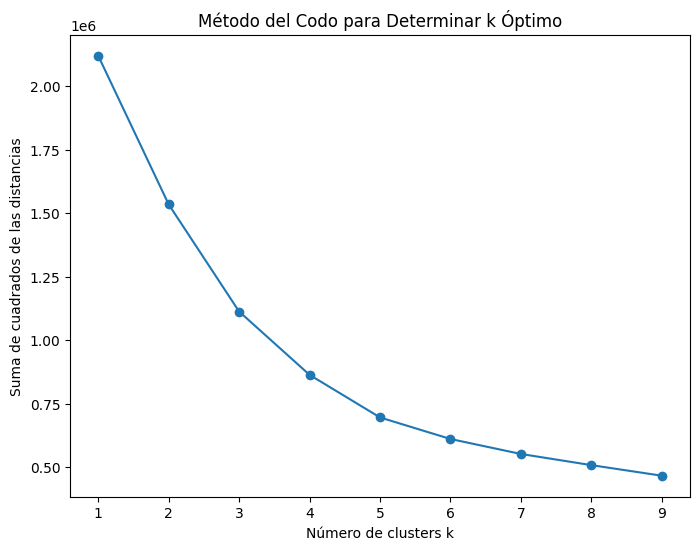

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Método del codo para encontrar el valor óptimo de k
sse = []
list_k = range(1, 10)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(features_scaled)
    sse.append(km.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Número de clusters k')
plt.ylabel('Suma de cuadrados de las distancias')
plt.title('Método del Codo para Determinar k Óptimo')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


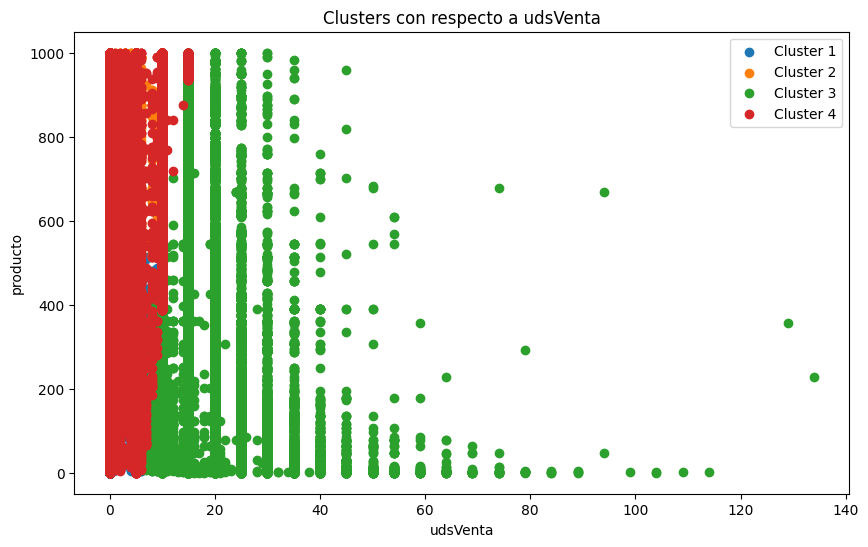

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Ajustar el modelo KMeans con el número óptimo de clusters
k_optimo = 4  # Debes cambiar esto con el valor óptimo determinado por el método del codo
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(features_scaled)  # Suponiendo que "features_scaled" es tu conjunto de datos escalados

# Obtener las etiquetas de cluster asignadas a cada punto
cluster_labels = kmeans.labels_

# Agregar las etiquetas de cluster al dataframe original
data_ventas_stock_calendario_out['cluster'] = cluster_labels

# Gráfico de los clusters con respecto a udsVenta
plt.figure(figsize=(10, 6))
for i in range(k_optimo):
    cluster_data = data_ventas_stock_calendario[data_ventas_stock_calendario_out['cluster'] == i]
    plt.scatter(cluster_data['udsVenta'], cluster_data['producto'], label=f'Cluster {i+1}')

plt.xlabel('udsVenta')
plt.ylabel('producto')
plt.title('Clusters con respecto a udsVenta')
plt.legend()
plt.show()


In [ ]:
data_ventas_stock_calendario_out[data_ventas_stock_calendario_out['cluster'] == 0]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior,udsVenta_media,cluster
0,1,2021-04-04,0,604,0,1,1,2021,4,4,6,0,13,24.516667,20.893184,87.196219,-38.162886,0.0,0
7,1,2021-04-11,0,436,0,1,0,2021,4,11,6,1,14,24.516667,20.893184,87.196219,-38.162886,0.0,0
14,1,2021-04-18,0,460,0,1,0,2021,4,18,6,2,15,24.516667,20.893184,87.196219,-38.162886,0.0,0
21,1,2021-04-25,0,312,0,1,0,2021,4,25,6,3,16,24.516667,20.893184,87.196219,-38.162886,0.0,0
27,1,2021-05-01,0,436,0,1,0,2021,5,1,5,0,17,23.919355,17.074858,75.143928,-27.305218,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373688,527,2023-01-22,0,99,0,1,0,2023,1,22,6,3,3,4.435484,5.364183,20.528033,-11.657065,0.0,0
373737,527,2023-03-12,0,40,0,1,0,2023,3,12,6,1,10,3.790323,4.932785,18.588676,-11.008031,0.0,0
373744,527,2023-03-19,0,69,0,1,0,2023,3,19,6,2,11,3.790323,4.932785,18.588676,-11.008031,0.0,0
373751,527,2023-03-26,0,94,0,1,0,2023,3,26,6,3,12,3.790323,4.932785,18.588676,-11.008031,0.0,0


In [ ]:
data_ventas_stock_calendario_out[data_ventas_stock_calendario_out['año'] == 2023]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior,udsVenta_media,cluster
637,1,2023-01-01,0,490,0,1,0,2023,1,1,6,0,52,16.564516,19.951269,76.418324,-43.289292,0.0,0
638,1,2023-01-02,30,490,1,0,0,2023,1,2,0,0,1,16.564516,19.951269,76.418324,-43.289292,30.0,2
639,1,2023-01-03,30,460,1,0,0,2023,1,3,1,0,1,16.564516,19.951269,76.418324,-43.289292,30.0,2
640,1,2023-01-04,0,688,1,0,0,2023,1,4,2,0,1,16.564516,19.951269,76.418324,-43.289292,0.0,0
641,1,2023-01-05,35,688,1,0,0,2023,1,5,3,0,1,16.564516,19.951269,76.418324,-43.289292,35.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706635,1000,2023-03-30,0,109,1,0,0,2023,3,30,3,4,13,2.983871,3.993815,14.965315,-8.997573,0.0,1
706636,1000,2023-03-31,0,109,1,0,0,2023,3,31,4,4,13,2.983871,3.993815,14.965315,-8.997573,0.0,1
706637,1000,2023-04-01,5,109,1,0,0,2023,4,1,5,0,13,2.916667,3.828048,14.400812,-8.567479,5.0,1
706638,1000,2023-04-02,0,109,0,1,0,2023,4,2,6,0,13,2.916667,3.828048,14.400812,-8.567479,0.0,1


In [ ]:
data_ventas_stock_calendario_out[data_ventas_stock_calendario_out['cluster'] == 1]

,producto,idSecuencia,udsVenta,udsStock,bolOpen,bolHoliday,estaEnPromocion,año,mes,dia,dia_semana,semana_mes,semana_año,media_ventas,desviacion_estandar_ventas,umbral_superior,umbral_inferior,udsVenta_media,cluster
363699,514,2021-09-10,8,0,1,0,0,2021,9,10,4,1,36,1.833333,3.440372,12.154449,-8.487782,7.5,1
365735,517,2021-04-09,5,89,1,0,0,2021,4,9,4,1,14,1.583333,2.836157,10.091804,-6.925137,5.0,1
365742,517,2021-04-16,5,69,1,0,0,2021,4,16,4,2,15,1.583333,2.836157,10.091804,-6.925137,5.0,1
365756,517,2021-04-30,5,109,1,0,0,2021,4,30,4,4,17,1.583333,2.836157,10.091804,-6.925137,5.0,1
365763,517,2021-05-07,5,99,1,0,0,2021,5,7,4,1,18,2.419355,3.592106,13.195673,-8.356963,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706634,1000,2023-03-29,0,109,1,0,0,2023,3,29,2,4,13,2.983871,3.993815,14.965315,-8.997573,0.0,1
706635,1000,2023-03-30,0,109,1,0,0,2023,3,30,3,4,13,2.983871,3.993815,14.965315,-8.997573,0.0,1
706636,1000,2023-03-31,0,109,1,0,0,2023,3,31,4,4,13,2.983871,3.993815,14.965315,-8.997573,0.0,1
706637,1000,2023-04-01,5,109,1,0,0,2023,4,1,5,0,13,2.916667,3.828048,14.400812,-8.567479,5.0,1


Entrenamiento

In [ ]:
data_ventas_stock_calendario_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706640 entries, 0 to 706639
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   producto                    706640 non-null  int64         
 1   idSecuencia                 706640 non-null  datetime64[ns]
 2   udsVenta                    706640 non-null  int64         
 3   udsStock                    706640 non-null  int64         
 4   bolOpen                     706640 non-null  int64         
 5   bolHoliday                  706640 non-null  int64         
 6   estaEnPromocion             706640 non-null  int64         
 7   año                         706640 non-null  int64         
 8   mes                         706640 non-null  int64         
 9   dia                         706640 non-null  int64         
 10  dia_semana                  706640 non-null  int64         
 11  semana_mes                  706640 non-

# **Entrenamiento**

In [ ]:
columnas_deseadas = ['producto', 'idSecuencia', 'udsVenta', 'bolOpen', 'bolHoliday', 'estaEnPromocion', 'año', 'mes', 'dia', 'dia_semana', 'semana_mes', 'semana_año', 'cluster']
data_ventas_stock_calendario_out_red = data_ventas_stock_calendario_out[columnas_deseadas]

In [ ]:
data_ventas_stock_calendario_out_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706640 entries, 0 to 706639
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   producto         706640 non-null  int64         
 1   idSecuencia      706640 non-null  datetime64[ns]
 2   udsVenta         706640 non-null  int64         
 3   bolOpen          706640 non-null  int64         
 4   bolHoliday       706640 non-null  int64         
 5   estaEnPromocion  706640 non-null  int64         
 6   año              706640 non-null  int64         
 7   mes              706640 non-null  int64         
 8   dia              706640 non-null  int64         
 9   dia_semana       706640 non-null  int64         
 10  semana_mes       706640 non-null  int64         
 11  semana_año       706640 non-null  int64         
 12  cluster          706640 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(11)
memory usage: 67.4 MB


In [ ]:
train = data_ventas_stock_calendario_out_red[data_ventas_stock_calendario_out_red['idSecuencia'] <= '2022-12-31']
# Validación: desde 2023-01-01 hasta 2023-02-28
validation = data_ventas_stock_calendario_out_red[(data_ventas_stock_calendario_out_red['idSecuencia'] >= '2023-01-01') & (data_ventas_stock_calendario_out_red['idSecuencia'] <= '2023-02-28')]
# Prueba: desde 2023-03-01 hasta 2023-04-03
test = data_ventas_stock_calendario_out_red[data_ventas_stock_calendario_out_red['idSecuencia'] >= '2023-03-01']

# Verificar los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(train))
print("Tamaño del conjunto de validación:", len(validation))
print("Tamaño del conjunto de prueba:", len(test))

Tamaño del conjunto de entrenamiento: 616616
Tamaño del conjunto de validación: 57112
Tamaño del conjunto de prueba: 32912


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']

# Inicializar y entrenar el modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
predicciones_validacion = modelo_rf.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = modelo_rf.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


Error cuadrático medio en el conjunto de validación: 12.312679344095812
Error cuadrático medio en el conjunto de prueba: 11.51222860354886


In [ ]:
# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


RMSE val: 3.508942767287009
RMSE test: 3.392967521735046


In [ ]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

Explained Variance Score: 0.5832853470241519


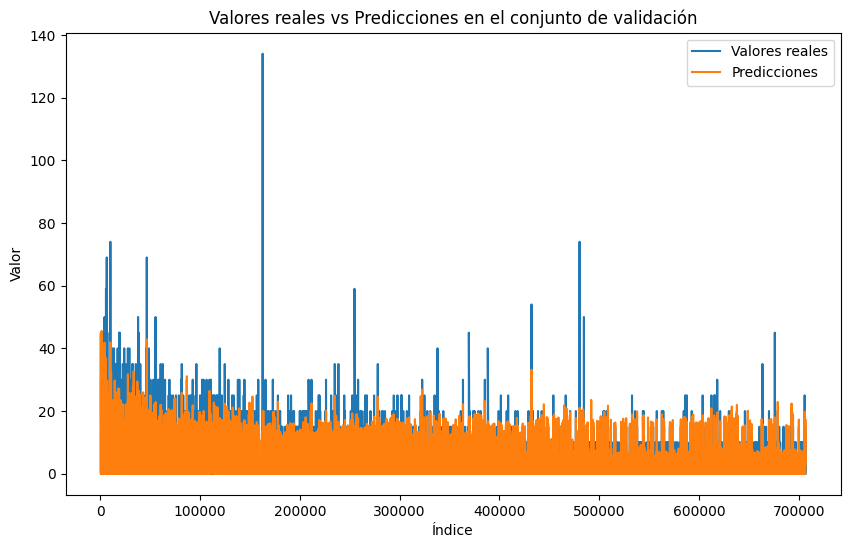

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_validation.index, y_validation, label='Valores reales')
plt.plot(y_validation.index, predicciones_validacion, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación para el conjunto de validación
r2_validation = r2_score(y_validation, predicciones_validacion)
print("Coeficiente de determinación en el conjunto de validación:", r2_validation)

# Calcular el coeficiente de determinación para el conjunto de prueba
r2_test = r2_score(y_test, predicciones_prueba)
print("Coeficiente de determinación en el conjunto de prueba:", r2_test)


Coeficiente de determinación en el conjunto de validación: 0.6050163364073853
Coeficiente de determinación en el conjunto de prueba: 0.5812947075234303


Ahora con diferentes hiperparametros

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [250, 500],
    'max_depth': [2, 4, 6]
}

# Inicializar el modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Inicializar GridSearchCV con el modelo y el rango de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba usando el mejor modelo
predicciones = best_rf_model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio en el conjunto de prueba:", mse)


Mejores hiperparámetros: {'max_depth': 6, 'n_estimators': 250}
Error cuadrático medio en el conjunto de prueba: 9.941404573500305


In [ ]:
# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


RMSE val: 3.508942767287009
RMSE test: 3.392967521735046


In [ ]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones)

print("Explained Variance Score:", evs)

Explained Variance Score: 0.6395629655677985


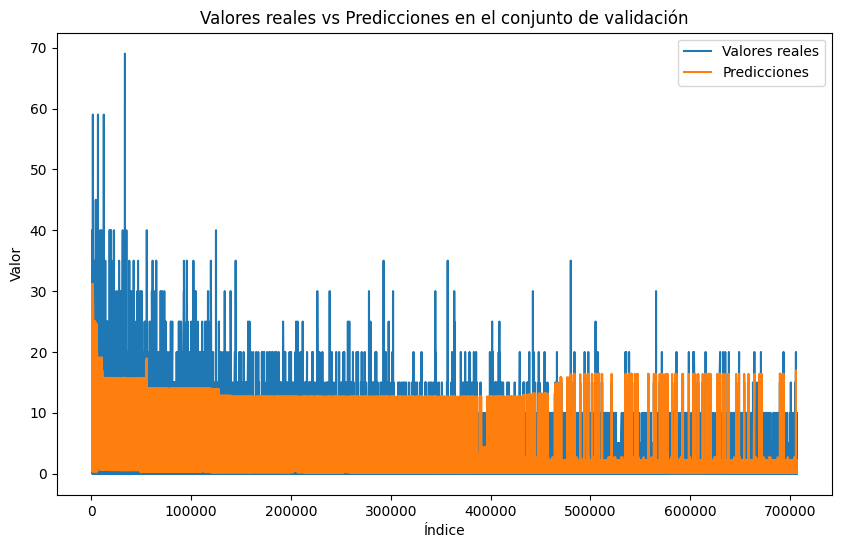

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_test.index, y_test, label='Valores reales')
plt.plot(y_test.index, predicciones, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación para el conjunto de validación
r2_validation = r2_score(y_validation, predicciones_validacion)
print("Coeficiente de determinación en el conjunto de validación:", r2_validation)

# Calcular el coeficiente de determinación para el conjunto de prueba
r2_test = r2_score(y_test, predicciones)
print("Coeficiente de determinación en el conjunto de prueba:", r2_test)


Coeficiente de determinación en el conjunto de validación: 0.6050163364073853
Coeficiente de determinación en el conjunto de prueba: 0.6384263331695672


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']

# Inicializar y entrenar el modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=4000, random_state=42, max_depth=6)
modelo_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
predicciones_validacion = modelo_rf.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = modelo_rf.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


Error cuadrático medio en el conjunto de validación: 10.955211334287695
Error cuadrático medio en el conjunto de prueba: 9.937989719192538


In [ ]:
# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


RMSE val: 3.309865757744216
RMSE test: 3.152457726789138


In [ ]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones)

print("Explained Variance Score:", evs)

Explained Variance Score: 0.6395629655677985


In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_test.index, y_test, label='Valores reales')
plt.plot(y_test.index, predicciones, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


NameError: name 'y_test' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación para el conjunto de validación
r2_validation = r2_score(y_validation, predicciones_validacion)
print("Coeficiente de determinación en el conjunto de validación:", r2_validation)

# Calcular el coeficiente de determinación para el conjunto de prueba
r2_test = r2_score(y_test, predicciones)
print("Coeficiente de determinación en el conjunto de prueba:", r2_test)


Coeficiente de determinación en el conjunto de validación: 0.648563128518145
Coeficiente de determinación en el conjunto de prueba: 0.6384263331695672


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Asegúrate de que tus datos estén en un formato adecuado para LSTM
# (número de muestras, número de pasos de tiempo, número de características)
# Esto puede requerir remodelar tus datos si aún no están en este formato

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']



# Remodelar los datos de entrenamiento y prueba
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Hacer predicciones en el conjunto de validación
predicciones_validacion = model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


Epoch 1/10
19270/19270 [==============================] - 40s 2ms/step - loss: 23.7017 - val_loss: 21.3867
Epoch 2/10
19270/19270 [==============================] - 39s 2ms/step - loss: 15.0975 - val_loss: 19.7107
Epoch 3/10
19270/19270 [==============================] - 39s 2ms/step - loss: 13.3679 - val_loss: 21.9463
Epoch 4/10
19270/19270 [==============================] - 39s 2ms/step - loss: 13.1570 - val_loss: 15.3154
Epoch 5/10
19270/19270 [==============================] - 40s 2ms/step - loss: 13.0875 - val_loss: 16.0851
Epoch 6/10
19270/19270 [==============================] - 39s 2ms/step - loss: 13.0216 - val_loss: 19.7594
Epoch 7/10
19270/19270 [==============================] - 38s 2ms/step - loss: 12.9995 - val_loss: 15.2990
Epoch 8/10
19270/19270 [==============================] - 39s 2ms/step - loss: 12.9071 - val_loss: 17.5808
Epoch 9/10
19270/19270 [==============================] - 39s 2ms/step - loss: 12.9064 - val_loss: 16.7729
Epoch 10/10
1785/1785 [==============

In [ ]:
# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


RMSE val: 4.147348567810583
RMSE test: 3.7909204988827687


In [ ]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

Explained Variance Score: 0.49120550208776015


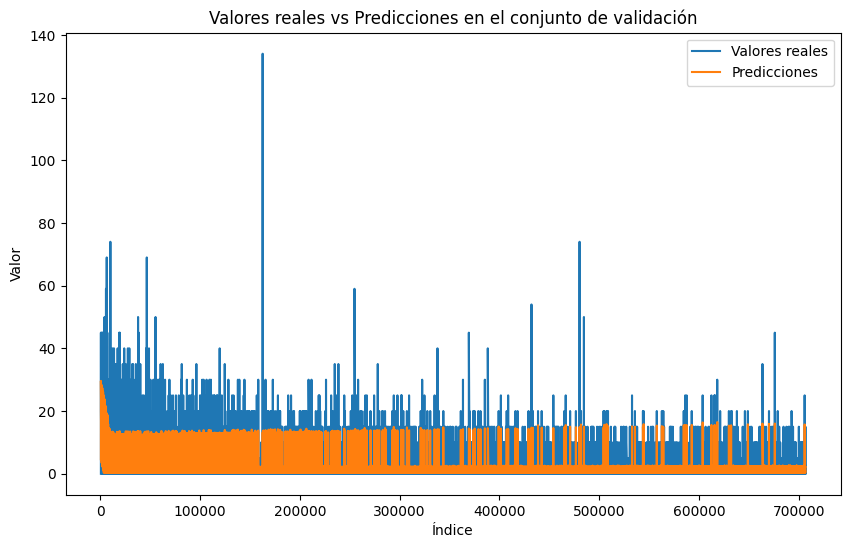

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_validation.index, y_validation, label='Valores reales')
plt.plot(y_validation.index, predicciones_validacion, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación para el conjunto de validación
r2_validation = r2_score(y_validation, predicciones_validacion)
print("Coeficiente de determinación en el conjunto de validación:", r2_validation)

# Calcular el coeficiente de determinación para el conjunto de prueba
r2_test = r2_score(y_test, predicciones_prueba)
print("Coeficiente de determinación en el conjunto de prueba:", r2_test)


Coeficiente de determinación en el conjunto de validación: 0.44514534928603
Coeficiente de determinación en el conjunto de prueba: 0.47528478781167516


In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']

# Inicializar el modelo XGBoost con los parámetros dados
modelo_xgb = XGBRegressor(n_estimators=500, max_depth=7, min_samples_split=5, learning_rate=0.01, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
modelo_xgb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
predicciones_validacion = modelo_xgb.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = modelo_xgb.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:14:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Error cuadrático medio en el conjunto de validación: 15.318263655013444
Error cuadrático medio en el conjunto de prueba: 13.502046426600012


In [ ]:
# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


RMSE val: 3.9138553441604667
RMSE test: 3.674513087008946


In [ ]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación para el conjunto de validación
r2_validation = r2_score(y_validation, predicciones_validacion)
print("Coeficiente de determinación en el conjunto de validación:", r2_validation)

# Calcular el coeficiente de determinación para el conjunto de prueba
r2_test = r2_score(y_test, predicciones_prueba)
print("Coeficiente de determinación en el conjunto de prueba:", r2_test)


Coeficiente de determinación en el conjunto de validación: 0.5058626342708276
Coeficiente de determinación en el conjunto de prueba: 0.5070147804576262


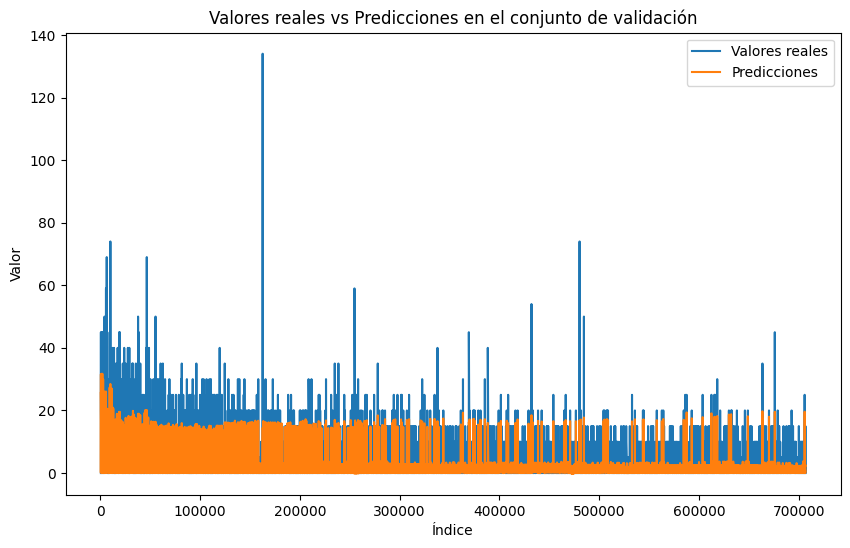

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_validation.index, y_validation, label='Valores reales')
plt.plot(y_validation.index, predicciones_validacion, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

Explained Variance Score: 0.5160034797935729


In [ ]:
datos_entrenamiento_v2 = datos_entrenamiento.apply(pd.to_numeric, errors='coerce')
datos_prueba_v2 = datos_prueba.apply(pd.to_numeric, errors='coerce')

# **Entrenamiento RNN**

In [ ]:
columnas_deseadas = ['producto', 'idSecuencia', 'udsVenta', 'bolOpen', 'bolHoliday', 'estaEnPromocion', 'año', 'mes', 'dia', 'dia_semana', 'semana_mes', 'semana_año', 'cluster']
data_ventas_stock_calendario_out_red = data_ventas_stock_calendario_out[columnas_deseadas]

In [ ]:
train = data_ventas_stock_calendario_out_red[data_ventas_stock_calendario_out_red['idSecuencia'] <= '2022-12-31']
# Validación: desde 2023-01-01 hasta 2023-02-28
validation = data_ventas_stock_calendario_out_red[(data_ventas_stock_calendario_out_red['idSecuencia'] >= '2023-01-01') & (data_ventas_stock_calendario_out_red['idSecuencia'] <= '2023-02-28')]
# Prueba: desde 2023-03-01 hasta 2023-04-03
test = data_ventas_stock_calendario_out_red[data_ventas_stock_calendario_out_red['idSecuencia'] >= '2023-03-01']

# Verificar los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(train))
print("Tamaño del conjunto de validación:", len(validation))
print("Tamaño del conjunto de prueba:", len(test))

Tamaño del conjunto de entrenamiento: 616616
Tamaño del conjunto de validación: 57112
Tamaño del conjunto de prueba: 32912


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Asegúrate de que tus datos estén en un formato adecuado para LSTM
# (número de muestras, número de pasos de tiempo, número de características)
# Esto puede requerir remodelar tus datos si aún no están en este formato

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']



# Remodelar los datos de entrenamiento y prueba
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Hacer predicciones en el conjunto de validación
predicciones_validacion = model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


Epoch 1/10
19270/19270 [==============================] - 42s 2ms/step - loss: 32.0484 - val_loss: 25.5695
Epoch 2/10
19270/19270 [==============================] - 40s 2ms/step - loss: 25.1350 - val_loss: 23.5893
Epoch 3/10
19270/19270 [==============================] - 40s 2ms/step - loss: 23.7199 - val_loss: 20.2821
Epoch 4/10
19270/19270 [==============================] - 40s 2ms/step - loss: 19.9275 - val_loss: 18.3593
Epoch 5/10
19270/19270 [==============================] - 39s 2ms/step - loss: 16.4187 - val_loss: 15.7821
Epoch 6/10
19270/19270 [==============================] - 38s 2ms/step - loss: 14.5775 - val_loss: 13.6562
Epoch 7/10
19270/19270 [==============================] - 41s 2ms/step - loss: 14.0485 - val_loss: 12.8800
Epoch 8/10
19270/19270 [==============================] - 39s 2ms/step - loss: 13.8789 - val_loss: 13.1217
Epoch 9/10
19270/19270 [==============================] - 41s 2ms/step - loss: 13.8075 - val_loss: 15.1972
Epoch 10/10
1785/1785 [==============

In [ ]:
# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


RMSE val: 3.990928176063636
RMSE test: 3.776509432726069


In [ ]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

Explained Variance Score: 0.5481724583670748


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Asegúrate de que tus datos estén en un formato adecuado para LSTM
# (número de muestras, número de pasos de tiempo, número de características)
# Esto puede requerir remodelar tus datos si aún no están en este formato

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']



# Remodelar los datos de entrenamiento y prueba
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, validation_data=(X_validation, y_validation))

# Hacer predicciones en el conjunto de validación
predicciones_validacion = model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


Epoch 1/20
19270/19270 [==============================] - 47s 2ms/step - loss: 25.9836 - val_loss: 22.2053
Epoch 2/20
19270/19270 [==============================] - 46s 2ms/step - loss: 20.0095 - val_loss: 18.1657
Epoch 3/20
19270/19270 [==============================] - 45s 2ms/step - loss: 17.8024 - val_loss: 16.3260
Epoch 4/20
19270/19270 [==============================] - 45s 2ms/step - loss: 16.4662 - val_loss: 16.4013
Epoch 5/20
19270/19270 [==============================] - 44s 2ms/step - loss: 14.0582 - val_loss: 13.7807
Epoch 6/20
19270/19270 [==============================] - 46s 2ms/step - loss: 13.1163 - val_loss: 12.2581
Epoch 7/20
19270/19270 [==============================] - 46s 2ms/step - loss: 12.9948 - val_loss: 12.3721
Epoch 8/20
19270/19270 [==============================] - 45s 2ms/step - loss: 12.9073 - val_loss: 11.8805
Epoch 9/20
19270/19270 [==============================] - 47s 2ms/step - loss: 12.8486 - val_loss: 12.1483
Epoch 10/20
19270/19270 [============

In [ ]:
# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


RMSE val: 3.4742487577600785
RMSE test: 3.2943858713769814


In [ ]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

Explained Variance Score: 0.611874587698827


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Asegúrate de que tus datos estén en un formato adecuado para LSTM
# (número de muestras, número de pasos de tiempo, número de características)
# Esto puede requerir remodelar tus datos si aún no están en este formato

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']



# Remodelar los datos de entrenamiento y prueba
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))

# Hacer predicciones en el conjunto de validación
predicciones_validacion = model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


Epoch 1/50
19270/19270 [==============================] - 151s 8ms/step - loss: 25.5658 - val_loss: 23.5293
Epoch 2/50
19270/19270 [==============================] - 145s 8ms/step - loss: 21.6554 - val_loss: 18.7992
Epoch 3/50
19270/19270 [==============================] - 141s 7ms/step - loss: 17.7284 - val_loss: 15.5428
Epoch 4/50
19270/19270 [==============================] - 149s 8ms/step - loss: 15.3905 - val_loss: 18.5069
Epoch 5/50
19270/19270 [==============================] - 146s 8ms/step - loss: 14.3761 - val_loss: 15.7246
Epoch 6/50
19270/19270 [==============================] - 132s 7ms/step - loss: 14.0905 - val_loss: 15.8163
Epoch 7/50
19270/19270 [==============================] - 133s 7ms/step - loss: 13.9423 - val_loss: 13.9112
Epoch 8/50
19270/19270 [==============================] - 137s 7ms/step - loss: 13.8428 - val_loss: 13.6643
Epoch 9/50
19270/19270 [==============================] - 133s 7ms/step - loss: 13.7517 - val_loss: 13.4136
Epoch 10/50
19270/19270 [===

In [ ]:
# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


RMSE val: 3.614058230706216
RMSE test: 3.4049341425670776


In [ ]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

Explained Variance Score: 0.5838708197761857


# **XGboost**

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [250, 500, 1000],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2]
}

# Inicializar el modelo XGBoost
modelo_xgb = XGBRegressor(random_state=42)

# Inicializar GridSearchCV con el modelo y el rango de hiperparámetros
grid_search = GridSearchCV(estimator=modelo_xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de validación
predicciones_validacion = best_model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = best_model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}
Error cuadrático medio en el conjunto de validación: 10.695816299758132
Error cuadrático medio en el conjunto de prueba: 9.726468745523498
RMSE val: 3.2704458869943305
RMSE test: 3.1187287066244633
Explained Variance Score: 0.6469516316140164


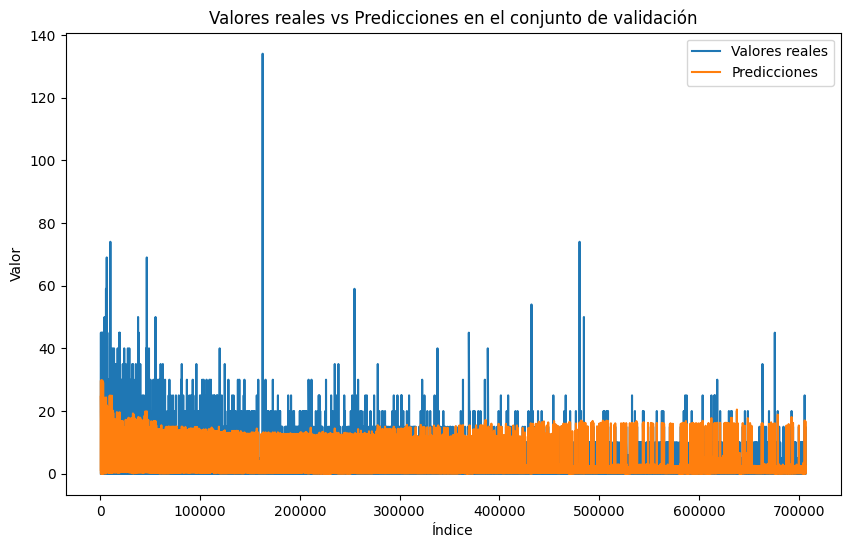

In [37]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_validation.index, y_validation, label='Valores reales')
plt.plot(y_validation.index, predicciones_validacion, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2]
}

# Inicializar el modelo XGBoost
modelo_xgb = XGBRegressor(random_state=42)

# Inicializar GridSearchCV con el modelo y el rango de hiperparámetros
grid_search = GridSearchCV(estimator=modelo_xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de validación
predicciones_validacion = best_model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = best_model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}
Error cuadrático medio en el conjunto de validación: 10.695816299758132
Error cuadrático medio en el conjunto de prueba: 9.726468745523498
RMSE val: 3.2704458869943305
RMSE test: 3.1187287066244633
Explained Variance Score: 0.6469516316140164


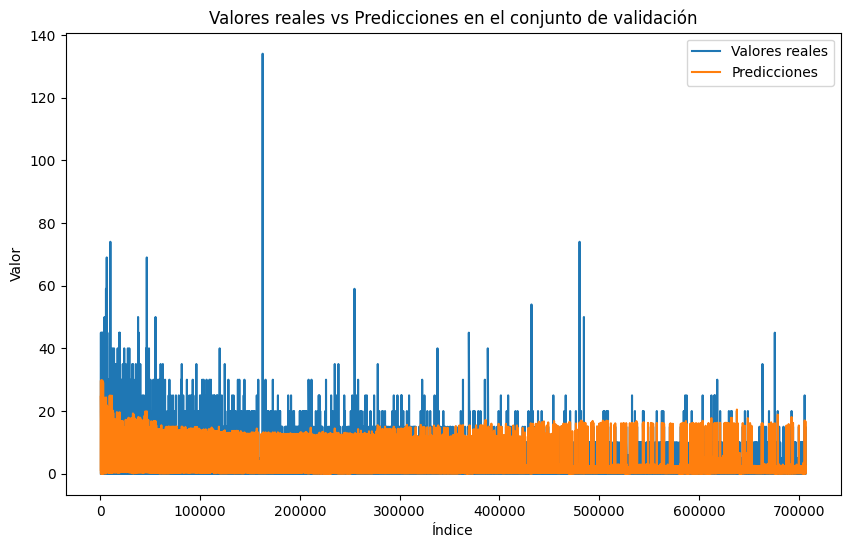

In [39]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_validation.index, y_validation, label='Valores reales')
plt.plot(y_validation.index, predicciones_validacion, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error


# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']

# Inicializar el modelo Naive Bayes Gaussiano
modelo_nb = GaussianNB()

# Ajustar el modelo Naive Bayes a los datos de entrenamiento
modelo_nb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
predicciones_validacion = modelo_nb.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = modelo_nb.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)

# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


Error cuadrático medio en el conjunto de validación: 73.22464630900686
Error cuadrático medio en el conjunto de prueba: 104.05596742829363
RMSE val: 8.557140077678223
RMSE test: 10.200782687043853


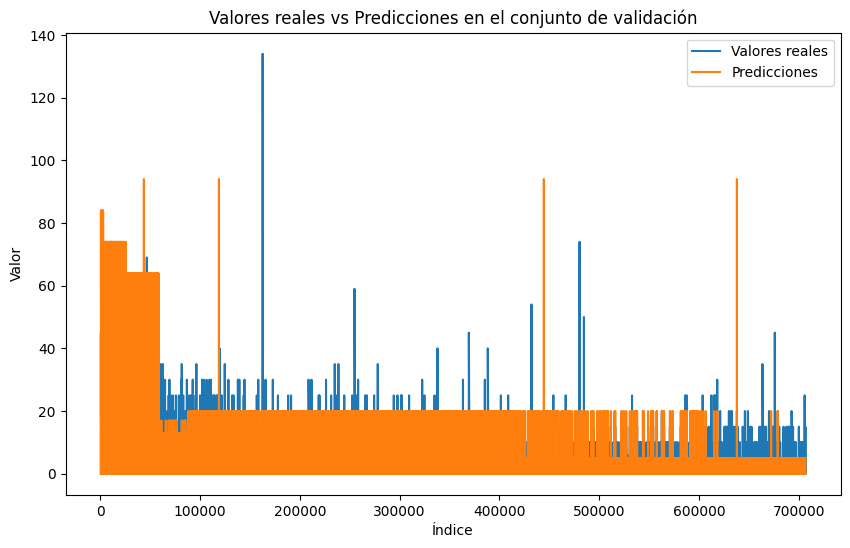

In [41]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_validation.index, y_validation, label='Valores reales')
plt.plot(y_validation.index, predicciones_validacion, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


In [42]:
from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

Explained Variance Score: -2.1693223467019984


# **Probar quitando dia, semana, año.**

In [43]:
columnas_deseadas = ['producto', 'idSecuencia', 'udsVenta', 'bolOpen', 'bolHoliday', 'estaEnPromocion', 'dia_semana', 'semana_mes', 'semana_año', 'cluster']
data_ventas_stock_calendario_out_red = data_ventas_stock_calendario_out[columnas_deseadas]

In [44]:
train = data_ventas_stock_calendario_out_red[data_ventas_stock_calendario_out_red['idSecuencia'] <= '2022-12-31']
# Validación: desde 2023-01-01 hasta 2023-02-28
validation = data_ventas_stock_calendario_out_red[(data_ventas_stock_calendario_out_red['idSecuencia'] >= '2023-01-01') & (data_ventas_stock_calendario_out_red['idSecuencia'] <= '2023-02-28')]
# Prueba: desde 2023-03-01 hasta 2023-04-03
test = data_ventas_stock_calendario_out_red[data_ventas_stock_calendario_out_red['idSecuencia'] >= '2023-03-01']

# Verificar los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(train))
print("Tamaño del conjunto de validación:", len(validation))
print("Tamaño del conjunto de prueba:", len(test))

Tamaño del conjunto de entrenamiento: 616616
Tamaño del conjunto de validación: 57112
Tamaño del conjunto de prueba: 32912


In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [250, 500],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2]
}

# Inicializar el modelo XGBoost
modelo_xgb = XGBRegressor(random_state=42)

# Inicializar GridSearchCV con el modelo y el rango de hiperparámetros
grid_search = GridSearchCV(estimator=modelo_xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de validación
predicciones_validacion = best_model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = best_model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
Error cuadrático medio en el conjunto de validación: 10.689191353097941
Error cuadrático medio en el conjunto de prueba: 9.73022622642666
RMSE val: 3.26943287943
RMSE test: 3.1193310543170405
Explained Variance Score: 0.646960145274837


In [58]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Asegúrate de que tus datos estén en un formato adecuado para LSTM
# (número de muestras, número de pasos de tiempo, número de características)
# Esto puede requerir remodelar tus datos si aún no están en este formato

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']



# Remodelar los datos de entrenamiento y prueba
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Hacer predicciones en el conjunto de validación
predicciones_validacion = model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)


Epoch 1/10
19270/19270 [==============================] - 69s 4ms/step - loss: 17.7240 - val_loss: 13.3226
Epoch 2/10
19270/19270 [==============================] - 65s 3ms/step - loss: 13.0084 - val_loss: 12.3749
Epoch 3/10
19270/19270 [==============================] - 70s 4ms/step - loss: 12.4574 - val_loss: 12.2629
Epoch 4/10
19270/19270 [==============================] - 68s 4ms/step - loss: 12.2601 - val_loss: 14.6788
Epoch 5/10
19270/19270 [==============================] - 62s 3ms/step - loss: 12.2500 - val_loss: 12.4228
Epoch 6/10
19270/19270 [==============================] - 63s 3ms/step - loss: 12.7985 - val_loss: 14.9726
Epoch 7/10
19270/19270 [==============================] - 63s 3ms/step - loss: 12.1100 - val_loss: 11.5678
Epoch 8/10
19270/19270 [==============================] - 65s 3ms/step - loss: 12.0230 - val_loss: 11.3159
Epoch 9/10
19270/19270 [==============================] - 63s 3ms/step - loss: 12.2194 - val_loss: 11.6824
Epoch 10/10
1785/1785 [==============

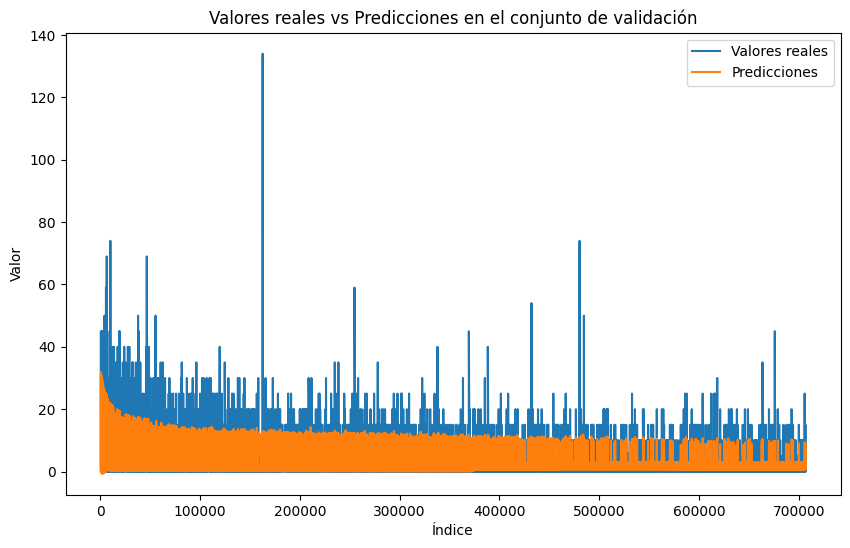

In [59]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_validation.index, y_validation, label='Valores reales')
plt.plot(y_validation.index, predicciones_validacion, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


In [62]:
# Crear un DataFrame con los valores reales y las predicciones
data = pd.DataFrame({
    'Real_Values': y_test,
    'Predicted_Values': predicciones_prueba.flatten()  # Usar flatten() si las predicciones son en forma de array 2D
})

# Mostrar las primeras filas del DataFrame
print(data.head())


     Real_Values  Predicted_Values
696           20         29.529213
697           10         31.010365
698           30         32.050114
699           25         32.836464
700            0          1.174260


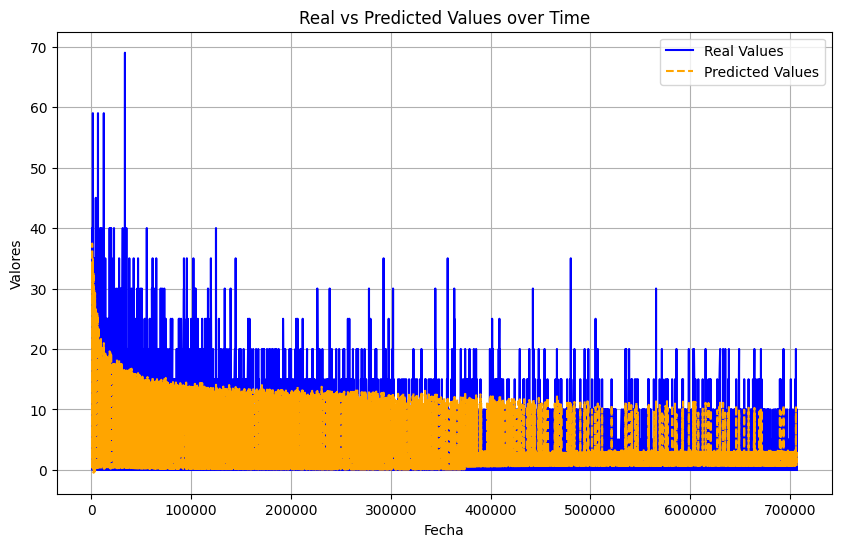

In [66]:
# Graficar las series temporales de valores reales y predichos
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Real_Values'], label='Real Values', color='blue')
plt.plot(data.index, data['Predicted_Values'], label='Predicted Values', linestyle='--', color='orange')

# Personalizar el gráfico
plt.title('Real vs Predicted Values over Time')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [67]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Asegúrate de que tus datos estén en un formato adecuado para LSTM
# (número de muestras, número de pasos de tiempo, número de características)
# Esto puede requerir remodelar tus datos si aún no están en este formato

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']



# Remodelar los datos de entrenamiento y prueba
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, validation_data=(X_validation, y_validation))

# Hacer predicciones en el conjunto de validación
predicciones_validacion = model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)


Epoch 1/20
19270/19270 [==============================] - 142s 7ms/step - loss: 17.0292 - val_loss: 12.9060
Epoch 2/20
19270/19270 [==============================] - 139s 7ms/step - loss: 12.8864 - val_loss: 12.0432
Epoch 3/20
19270/19270 [==============================] - 134s 7ms/step - loss: 12.4798 - val_loss: 12.7906
Epoch 4/20
19270/19270 [==============================] - 136s 7ms/step - loss: 12.1730 - val_loss: 13.4567
Epoch 5/20
19270/19270 [==============================] - 136s 7ms/step - loss: 12.3056 - val_loss: 14.0574
Epoch 6/20
19270/19270 [==============================] - 135s 7ms/step - loss: 12.0396 - val_loss: 11.6019
Epoch 7/20
19270/19270 [==============================] - 137s 7ms/step - loss: 12.1447 - val_loss: 12.1248
Epoch 8/20
19270/19270 [==============================] - 136s 7ms/step - loss: 12.4277 - val_loss: 12.5967
Epoch 9/20
19270/19270 [==============================] - 134s 7ms/step - loss: 12.1730 - val_loss: 12.0192
Epoch 10/20
19270/19270 [===

In [68]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Asegúrate de que tus datos estén en un formato adecuado para LSTM
# (número de muestras, número de pasos de tiempo, número de características)
# Esto puede requerir remodelar tus datos si aún no están en este formato

# Seleccionar características y objetivo para cada conjunto
X_train = train.drop(['udsVenta', 'idSecuencia'], axis=1)
y_train = train['udsVenta']

X_validation = validation.drop(['udsVenta', 'idSecuencia'], axis=1)
y_validation = validation['udsVenta']

X_test = test.drop(['udsVenta', 'idSecuencia'], axis=1)
y_test = test['udsVenta']



# Remodelar los datos de entrenamiento y prueba
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=500, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))

# Hacer predicciones en el conjunto de validación
predicciones_validacion = model.predict(X_validation)

# Calcular el error cuadrático medio en el conjunto de validación
mse_validation = mean_squared_error(y_validation, predicciones_validacion)
print("Error cuadrático medio en el conjunto de validación:", mse_validation)

# Hacer predicciones en el conjunto de prueba
predicciones_prueba = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test = mean_squared_error(y_test, predicciones_prueba)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


# Calcular el RMSE
rmse_validation = np.sqrt(mse_validation)
print("RMSE val:", rmse_validation)

rmse_test = np.sqrt(mse_test)
print("RMSE test:", rmse_test)


from sklearn.metrics import explained_variance_score

# Calcular el Explained Variance Score
evs = explained_variance_score(y_test, predicciones_prueba)

print("Explained Variance Score:", evs)


Epoch 1/50
19270/19270 [==============================] - 423s 22ms/step - loss: 16.6327 - val_loss: 12.8202
Epoch 2/50
19270/19270 [==============================] - 422s 22ms/step - loss: 12.8516 - val_loss: 12.8061
Epoch 3/50
19270/19270 [==============================] - 427s 22ms/step - loss: 12.3362 - val_loss: 12.0145
Epoch 4/50
19270/19270 [==============================] - 422s 22ms/step - loss: 12.1779 - val_loss: 11.4230
Epoch 5/50
19270/19270 [==============================] - 419s 22ms/step - loss: 12.0647 - val_loss: 12.0126
Epoch 6/50
19270/19270 [==============================] - 424s 22ms/step - loss: 12.0035 - val_loss: 11.3612
Epoch 7/50
19270/19270 [==============================] - 416s 22ms/step - loss: 11.9249 - val_loss: 11.3779
Epoch 8/50
19270/19270 [==============================] - 420s 22ms/step - loss: 11.9368 - val_loss: 11.5658
Epoch 9/50
19270/19270 [==============================] - 419s 22ms/step - loss: 11.8397 - val_loss: 11.3157
Epoch 10/50
19270/1

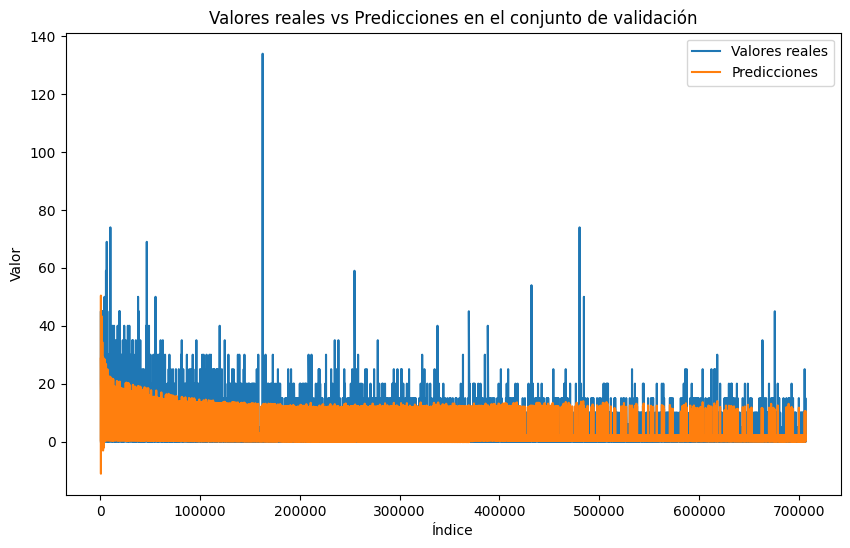

In [69]:
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_validation.index, y_validation, label='Valores reales')
plt.plot(y_validation.index, predicciones_validacion, label='Predicciones')

# Agregar etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores reales vs Predicciones en el conjunto de validación')
plt.legend()

# Mostrar el gráfico
plt.show()


Guardar resultados

In [70]:
ruta_pred_test = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/test_preds.csv"
pd.DataFrame(predicciones_prueba).to_csv(ruta_pred_test)
ruta_pred_val = "/content/drive/Othercomputers/Mi portátil/UOC/4o Semestre/TFM/Datos/val_preds.csv"
pd.DataFrame(predicciones_validacion).to_csv(ruta_pred_val)
